<a href="https://colab.research.google.com/github/RDifault/Machine-and-Deep-Learning-Projects/blob/main/Linear_Regression_to_Predict_Fuel_Consumption_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression to Predict Fuel Consumption

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Load and Profile the data

In [ ]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/FuelConsumptionCo2.csv

--2021-03-04 04:03:30--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.01s   

2021-03-04 04:03:31 (4.83 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



In [ ]:
fuelData = pd.read_csv("FuelConsumptionCo2.csv")
print(fuelData.dtypes)
print(fuelData.isna().values.any)

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object
<built-in method any of numpy.ndarray object at 0x7f7336e86d00>


In [ ]:
print(fuelData.info())
print(fuelData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

   CYLINDERS  ENGINESIZE  ...  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB_MPG
0          4         2.0  ...                  6.7                        33
1          4         2.4  ...                  7.7                        29
2          4         1.5  ...                  5.8                        48
3          6         3.5  ...                  9.1                        25
4          6         3.5  ...                  8.7                        27

[5 rows x 7 columns]


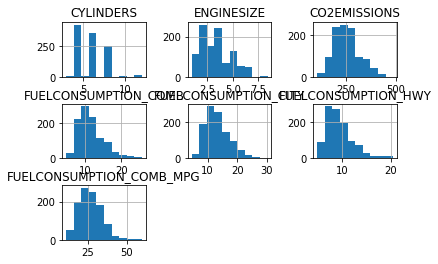

In [ ]:
newFuelData = fuelData[["CYLINDERS", "ENGINESIZE", "CO2EMISSIONS", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB_MPG"]]
print(newFuelData.head())
newFuelData.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualize the Data (Scatter)

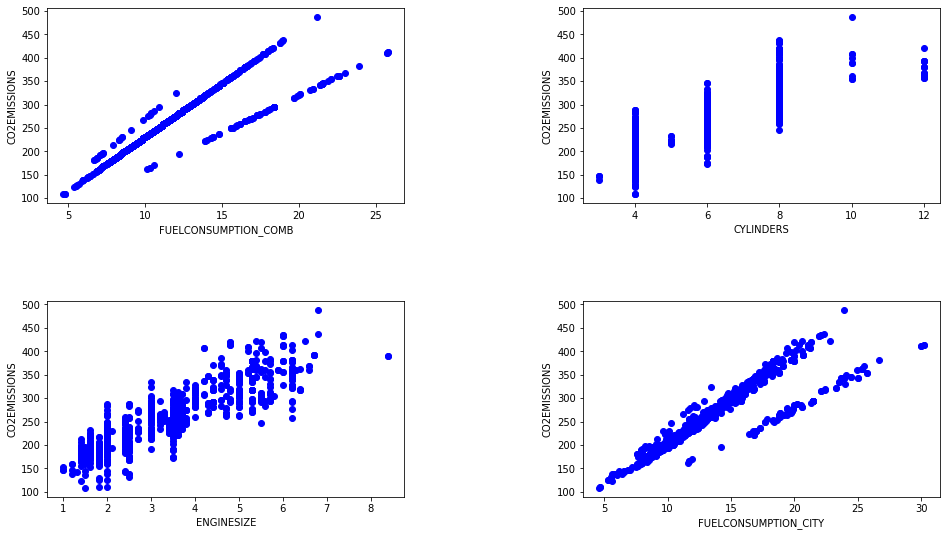

In [ ]:
plt.subplot(221)
plt.scatter(newFuelData["FUELCONSUMPTION_COMB"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

plt.subplot(222)
plt.scatter(newFuelData["CYLINDERS"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

plt.subplot(223)
plt.scatter(newFuelData["ENGINESIZE"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

plt.subplot(224)
plt.scatter(newFuelData["FUELCONSUMPTION_CITY"], newFuelData["CO2EMISSIONS"], color="blue")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Engine Size

In [ ]:
train, test = train_test_split(newFuelData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["ENGINESIZE"]], train[["CO2EMISSIONS"]])
print("Coefficients: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficients:  [[38.78753135]]
Intercept:  [126.19000983]


Visualize the regression to the plot

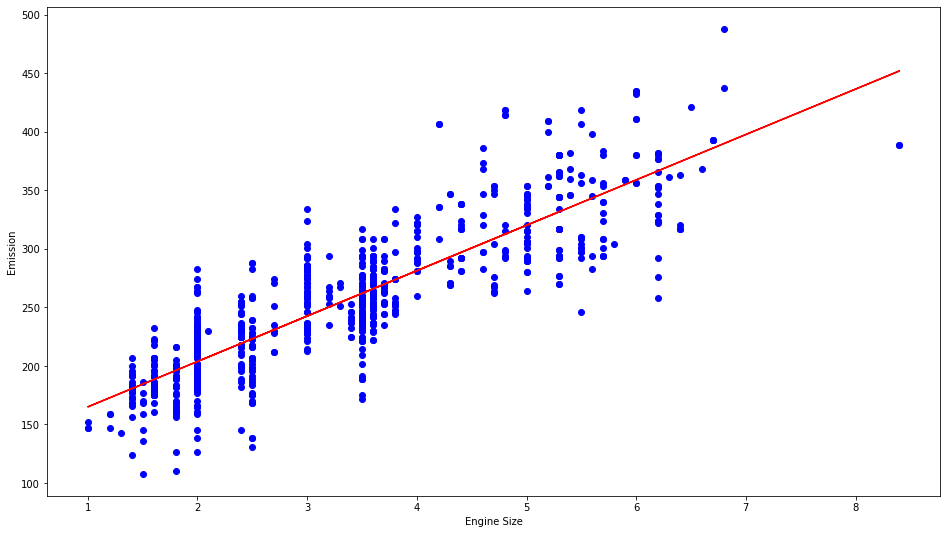

In [ ]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train[["ENGINESIZE"]], regression.coef_ * train[["ENGINESIZE"]] + regression.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualization with Seaborn Package

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


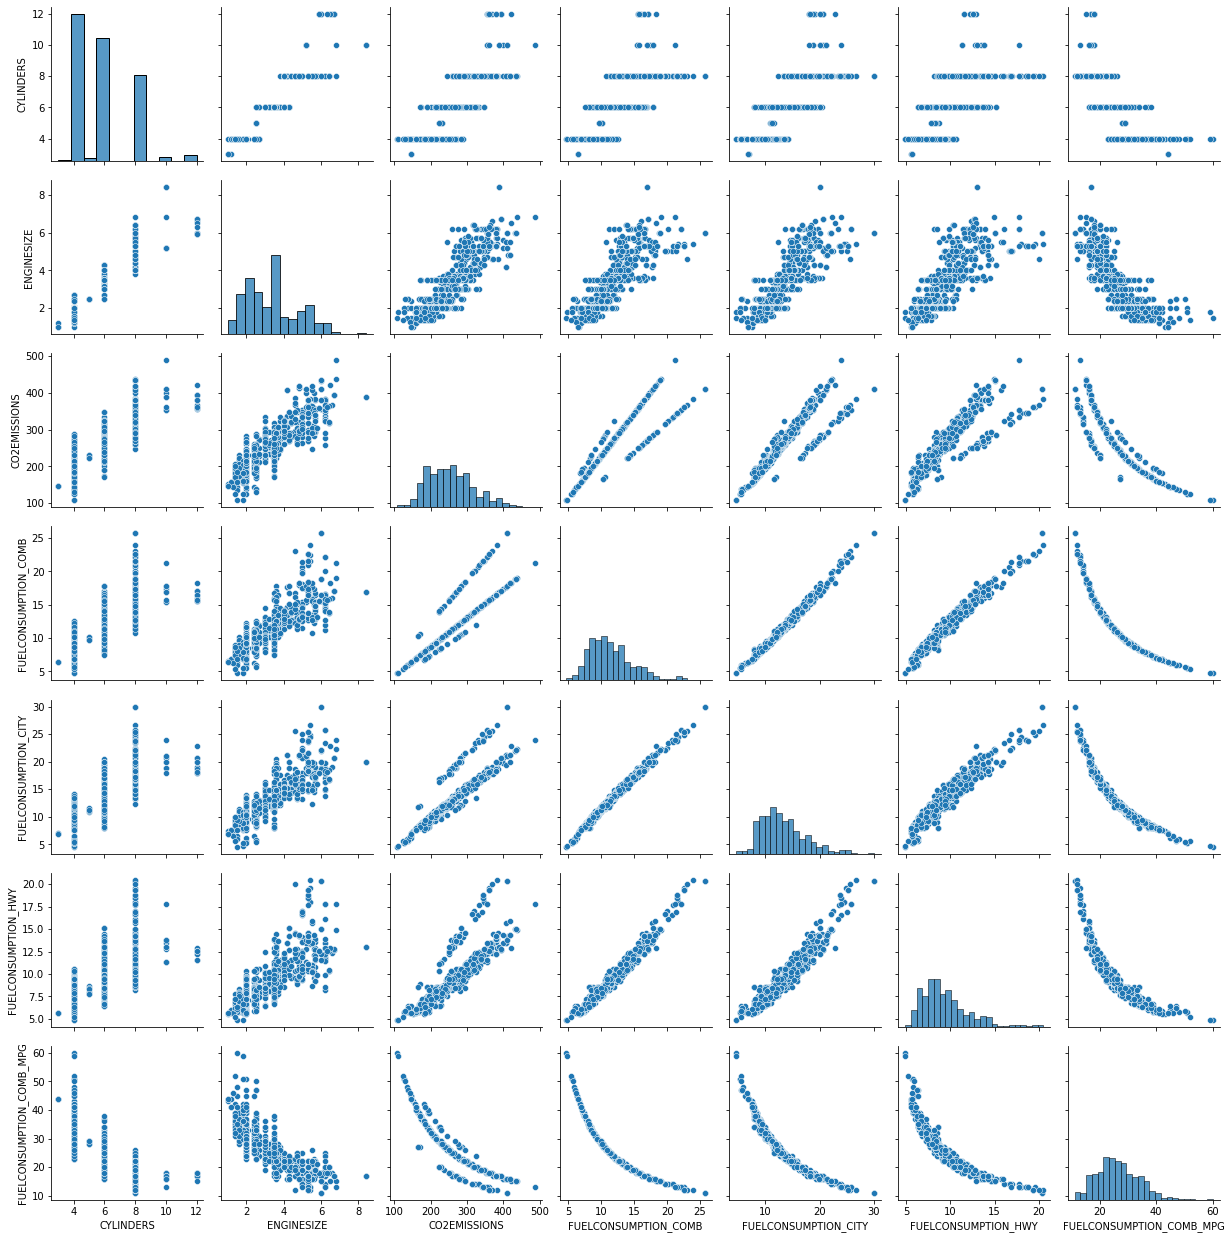

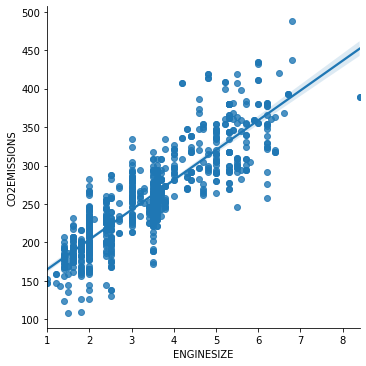

In [ ]:
sb.pairplot(train)
sb.lmplot("ENGINESIZE", "CO2EMISSIONS", data = train)
plt.show()

## Predict new data & evaluate the model

In [ ]:
prediction = regression.predict(test[["ENGINESIZE"]])
for i in range(len(test)) :
  print(test[["ENGINESIZE"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["CO2EMISSIONS"]], prediction))
print("MSE : ", mean_squared_error(test[["CO2EMISSIONS"]], prediction))
print("R2 : ", r2_score(test[["CO2EMISSIONS"]], prediction))

[3.7] [269.70387584]
[2.4] [219.28008508]
[2.] [203.76507254]
[2.] [203.76507254]
[1.5] [184.37130686]
[3.8] [273.58262898]
[2.4] [219.28008508]
[2.] [203.76507254]
[3.6] [265.82512271]
[2.4] [219.28008508]
[6.2] [366.67270422]
[6.6] [382.18771677]
[2.5] [223.15883822]
[1.8] [196.00756627]
[5.3] [331.76392601]
[5.] [320.1276666]
[2.5] [223.15883822]
[3.] [242.55260389]
[2.] [203.76507254]
[2.] [203.76507254]
[3.] [242.55260389]
[3.6] [265.82512271]
[5.3] [331.76392601]
[2.4] [219.28008508]
[3.7] [269.70387584]
[1.6] [188.25006]
[5.4] [335.64267914]
[3.3] [254.1888633]
[3.] [242.55260389]
[2.5] [223.15883822]
[3.] [242.55260389]
[3.7] [269.70387584]
[3.6] [265.82512271]
[2.] [203.76507254]
[3.] [242.55260389]
[3.7] [269.70387584]
[1.2] [172.73504746]
[5.] [320.1276666]
[3.5] [261.94636957]
[3.] [242.55260389]
[3.7] [269.70387584]
[2.] [203.76507254]
[2.] [203.76507254]
[6.6] [382.18771677]
[5.3] [331.76392601]
[3.2] [250.31011016]
[3.6] [265.82512271]
[6.2] [366.67270422]
[2.] [203.7650